In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates
import ast
import os.path
from glob import glob
from datetime import datetime
import pytz
import difflib
from collections import OrderedDict

In [2]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "CentipedeCentral"
#For now, just include all json files
pattern = os.path.join(ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
    
#print data
#Combine data

#print len(data)
#For better idea about data, view: https://dht.chylex.com/build/viewer.html


In [3]:
#Reading data through

#Message data
messageData = []


#UID associated with name
"""
      "UID": {
        "name": Name
      },
"""
userList = []

#List of UIDs. Index if mentioned in 'u' in messages
"""
Ex:
      "384741477567430657": {
        "u": 13,
        "t": 1511799916403,
        "m": "https://i.imgur.com/Jud77MH.png",
        "e": [
          {
            "url": "https://imgur.com/Jud77MH",
            "type": "image"
          }
        ]
      },
"""
userIndex = []


#Channel Info
"""
      "UID of Channel": {
        "server": _IndexNumber_,
        "name": Name
      }
"""
channelInfo = []

In [4]:
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

#print messageData



In [142]:
#messageData


[{u'346311784791277579': {u'346315047426981888': {u'f': 1,
    u'm': u"---------------------------------------------------\n***What's the <#346311784791277579>?***\n---------------------------------------------------\nWelcome to the donators leaderboard! It is here you will find a leaderboard of our top monthly/one time donators who have contributed to assisting the server. Want to donate yourself, and get on the leaderboard/receive perks? Check out the patreon, and one time donation paypal following these links;\n\n<https://www.patreon.com/lightindarkness>\n<https://www.paypal.me/lightindarkness> (Please use Goods, and services but do NOT add your shipping address!)\n\n---------------------------------------------------\n***The leaderboard lists are as follows;***\n---------------------------------------------------\n-Combined patreon & 1 time leaderboard\n-Patreon supporter leaderboard\n-1-time support leader",
    u't': 1502638341529,
    u'u': 0},
   u'346315568837689344': {u'f': 1

In [5]:
#Timestamps are in epoch time
timestamps = []
message = []
messageID = []
author = []

#author ID = index associated with userIndex
authorID = []
authorName = []

#Not a priority RN but collect anyways
imageData = []

#Convert lists to dictionaries
"""messageData2 = json.dumps(messageData)[0]
userList2 = json.dumps(userList)[0]
userIndex2 = json.dumps(userIndex)[0]
channelInfo2 = json.dumps(channelInfo)[0]

messageData3 = json.dumps(messageData)
userList3 = json.dumps(userList)
userIndex3 = json.dumps(userIndex)
channelInfo3 = json.dumps(channelInfo)

messageData4 = ast.literal_eval(messageData3)
userList4 = ast.literal_eval(userList3)
userIndex4 = ast.literal_eval(userIndex3)
channelInfo4 = ast.literal_eval(channelInfo3)"""

'messageData2 = json.dumps(messageData)[0]\nuserList2 = json.dumps(userList)[0]\nuserIndex2 = json.dumps(userIndex)[0]\nchannelInfo2 = json.dumps(channelInfo)[0]\n\nmessageData3 = json.dumps(messageData)\nuserList3 = json.dumps(userList)\nuserIndex3 = json.dumps(userIndex)\nchannelInfo3 = json.dumps(channelInfo)\n\nmessageData4 = ast.literal_eval(messageData3)\nuserList4 = ast.literal_eval(userList3)\nuserIndex4 = ast.literal_eval(userIndex3)\nchannelInfo4 = ast.literal_eval(channelInfo3)'

In [6]:
#Analyze message data
#print type(messageData4)

#Get message, userIndex, timestamp, and image data
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            messageID.append(c)
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
            """for d in a[b][c]:
                print a[b][c]
                #print d
                #temp = map(str, d)
                #print type(temp)
                #print temp[2]
                #if temp == 'm':

                """
            

        #authorID.append(userList)

print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)


            
"""for key, value in messageData.iteritems():
    for key2, value2 in messageData.iteritems():
        print key2"""

Number of messages: 2979089
2979089
2979089


'for key, value in messageData.iteritems():\n    for key2, value2 in messageData.iteritems():\n        print key2'

In [7]:
dfff = pd.DataFrame({'Message':message})
print dfff

dfff.to_csv(ChannelName + "AllPosts.csv", sep='\t', index = False, encoding='utf-8-sig')

                                                   Message
0                has analysis' like this that are unbiased
1                                                        🤢
2                                          WE JUST TOOK PA
3                Weeaboo trash but incredibly intelligent.
4                                             So did Trump
5        I guess, you don't have jobs with that degree,...
6                                                       nu
7                                                   hi fag
8                                               IF YOU DID
9        <@165109207648043008> http://www.latinorebels....
10       They are anti-brexit and anti-trump, they even...
11       <:helpme:277476113457086464> REMOVE <:helpme:2...
12                        but this is like first year shit
13       Unemployment rate just jumped 500k - all CTR l...
14                                    Putin won't take him
15       no one answered my question when I said "What .

In [8]:
#Map user ID to real name
"""print type(userList)
print userList"""
"""print userIndex
print type(userIndex)"""
userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

"""#Match first_date of post with index of authorName
for index in userIndex2:
    timestamps2 = []
    authorID2 = []
    message2 = []
    realID = index
    #Search for first post:
    minValue = 9999999999
    for a in messageData:   
        for b in a:
            for c in a[b]:
                temp = a[b][c]
                #print type(a[b][c])
                for key, value in temp.iteritems():
                    if key == "m": 
                        message2.append(value)
                    if key == "u":
                        authorID2.append(value)
                    if key == "t":
                        timestamps2.append(value)
                        if value < min:
                            minValue = value
    for 
    time_referential.append()"""

#Find name associated with ID
for index in authorID:
    #print index
    realID = userIndex2[index]
    realIDs.append(realID)
    #print realID
    #print userList2[realID]
    authorName.append(userList2[realID]["name"])
    #firstpost.append(time_referential[index])
    
#Note there are repeats in authorName so that you can directly associate it with the correct message_____

print len(authorName)




#From first data set. Should be bigger when all json files are added together
"""30300
30300
30300"""

15133
11482
2979089


'30300\n30300\n30300'

In [8]:
print "Number of users: " + str(len(userList2))

Number of users: 11482


In [13]:
#Store messages in file
jsonList = []

for i in range(0,len(message)):
    jsonList.append({'message': message[i], 'timestamp': timestamps[i], 'authorID':authorID[i]})

#Save frequency to file
#Store frequency
#output list of hate words into text file
#DON'T RUN
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
try:
    f = open(ChannelName + 'MessagesDataFull'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "MessagesDataFull.json! Be careful!!!"



2016-10-01 19:26:06.046000
2017-08-15 06:57:36.330000
                         count
Date                          
2016-10-30 00:05:53.199      1
2016-12-13 22:39:51.480      1
2016-11-09 06:45:58.262      1
2016-11-11 06:04:41.357      1
2017-01-20 06:40:43.544      1
2017-02-15 15:48:45.126      1
2017-02-14 19:24:37.336      1
2016-12-05 20:27:18.783      1
2016-12-14 02:39:16.396      1
2016-11-25 02:00:21.486      1
2016-12-23 22:22:07.287      1
2017-02-09 00:51:30.960      1
2017-02-02 17:35:10.567      1
2016-11-09 00:10:13.398      1
2016-10-23 06:44:27.963      1
2017-02-19 18:37:39.313      1
2016-12-22 16:16:16.113      1
2016-10-24 18:47:14.772      1
2017-02-02 13:42:09.445      1
2017-01-14 21:50:30.728      1
2017-02-10 06:01:30.377      1
2016-11-11 00:33:53.648      1
2017-04-07 08:02:42.253      1
2017-01-11 01:04:32.689      1
2016-11-18 19:21:43.693      1
2016-11-27 22:01:54.402      1
2016-11-05 01:18:57.926      1
2016-10-06 19:50:22.780      1
2016-11-11 08:44

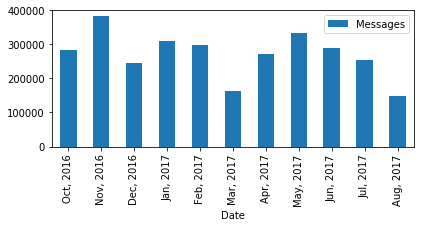

In [14]:
#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()

print df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')



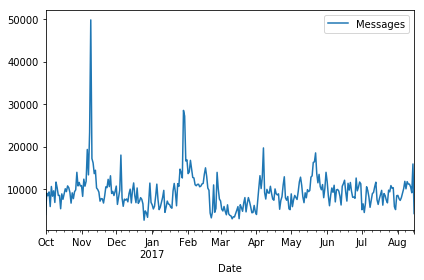

In [16]:
#Bar all
df = pd.DataFrame({'Date':timestamps})
df['count'] = 1

#Date time
df['Date'] = pd.to_datetime(df['Date'],unit='ms')

#Remove November Data for consistency:
df = df[(df['Date'].dt.year != 2017) | (df['Date'].dt.month != 11)]

#Reindex then delete
df.index = df['Date']
del df['Date']

df.columns = ["Messages"]
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesLine.png')

In [17]:
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

gb = df.groupby("user")["count"].agg({'count':sum})
#gb = df.groupby("user")["count"].sum()

#gb = gb.reset_index(drop=True)
#gb.columns = ["User","Count"]
#print gb
gb= gb.sort_values("count")
gb["ones"]=1
print gb
gb.to_csv(ChannelName + "UserPosts.csv", sep='\t', encoding = 'utf-8')

#Great graph info: https://stackoverflow.com/a/29499109/4698963
#print gb.plot(kind='bar')

#TODO
#Group by 1000s
#How many users per 1000s count
#Number of messages vs. Number of users
#Not sure how to do this rn


                             count  ones
user                                    
fistercentipede                  1     1
Falker                           1     1
Pyrogelum                        1     1
knicker                          1     1
PySnow                           1     1
stanyy                           1     1
FUCCBOI                          1     1
ssilkdev                         1     1
knucklesuppunk                   1     1
Bito                             1     1
Fame                             1     1
Merix                            1     1
FOX FACE (U+1F98A) 🦊             1     1
Xuong so                         1     1
spla2n hype machine              1     1
spirit                           1     1
Meyeke                           1     1
Ez2poortea                       1     1
BlackTed_Tha_Prince              1     1
PuppyLover10                     1     1
spez                             1     1
sqwok.im                         1     1
Pupper1         

                        Date  count2
0    2016-10-30 00:05:53.199    1690
1    2016-12-13 22:39:51.480    1356
2    2016-11-09 06:45:58.262       4
3    2016-11-11 06:04:41.357       4
4    2017-01-20 06:40:43.544    1525
5    2017-02-15 15:48:45.126     204
6    2017-02-14 19:24:37.336       6
7    2016-12-05 20:27:18.783      32
8    2016-12-14 02:39:16.396      75
9    2016-11-25 02:00:21.486       1
10   2016-12-23 22:22:07.287    2906
11   2017-02-09 00:51:30.960     144
12   2017-02-02 17:35:10.567     339
13   2016-11-09 00:10:13.398   20021
14   2016-10-23 06:44:27.963       2
15   2017-02-19 18:37:39.313     140
16   2016-12-22 16:16:16.113     622
17   2016-10-24 18:47:14.772     194
18   2017-02-02 13:42:09.445     290
19   2017-01-14 21:50:30.728      17
20   2017-02-10 06:01:30.377       3
21   2016-11-11 00:33:53.648       8
22   2017-04-07 08:02:42.253       6
23   2017-01-11 01:04:32.689      26
24   2016-11-18 19:21:43.693     104
25   2016-11-27 22:01:54.402       4
2

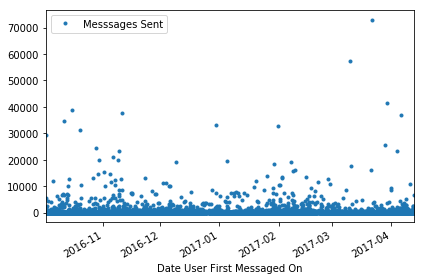

In [18]:
#Scattergraph
#Numer of posts over time
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
#gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
gb2 = gb2.reset_index(drop=True)
gb2['timestamps'] = df['date']
gb2['Date'] = pd.to_datetime(df['date'],unit='ms')
gb2["count2"] = gb2["count"]
del gb2['timestamps']
del gb2["count"]
print gb2

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
#bigdata.index = bigdata['Date']

#print gb2
gb2.columns = ["Date User First Messaged On","Messsages Sent"]
retweets = gb2.plot(x="Date User First Messaged On", y="Messsages Sent", style=".")
plt.tight_layout()
plt.savefig(ChannelName + 'MessagesSentScatter.png')
#my_scatter = pd.scatter_matrix(bigdata, diagonal="kde")

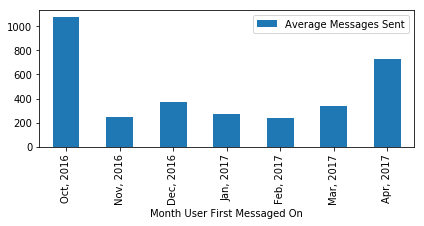

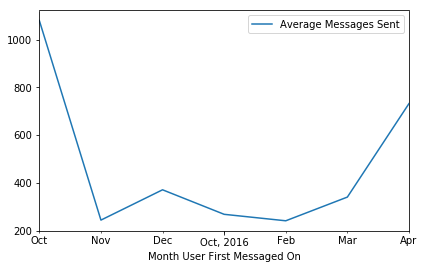

In [15]:
#Time referential graph vs average number of posts
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
bigdata = pd.concat([gb, gb2], axis=1)
bigdata = bigdata.reset_index(drop=True)
#print bigdata
#print bigdata

#Remove November Data for consistency:
bigdata = bigdata[(bigdata['Date'].dt.year != 2017) | (bigdata['Date'].dt.month != 11)]

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
bigdata.index = bigdata['Date']
gb3 = bigdata.groupby([(bigdata.index.year),(bigdata.index.month)]).mean().reset_index()
#print gb3

gb3.columns = ["Year", "Month", "Average Messages Sent"]
gb3['Month User First Messaged On'] = gb3[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb3['Month User First Messaged On'] = pd.to_datetime(gb3['Month User First Messaged On'])
del gb3['Year']
del gb3['Month']

#Bar
ax = gb3.set_index('Month User First Messaged On').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeRefVsAveragePostsBar.png')



#Line
ax = gb3.set_index('Month User First Messaged On').plot()
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeRefVsAveragePostsLine.png')

#Find time_referential = start date of posting

In [ ]:
#Average number of posts per user vs Time started
#Time

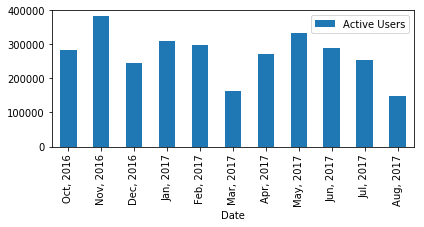

In [20]:
#Number of active users per month

#active user = user who posts at least once
df = pd.DataFrame({'date':timestamps, 'messages':message, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1
df.index = df['Date']
del df['date']

#Sort
df.sort_values(by='Date')
#print df
"""#Seperate dataframe into months so that you can remove duplicates later

#Group by month for number of active users
gb = df.groupby([(df.index.year),(df.index.month)])
print gb
"""

#List of dfs by month and year
dfList = []
for region, df_region in df.groupby([(df.index.year),(df.index.month)]):
    #print(len(df_region))
    dfList.append(df_region)
    
#Drop duplicates from timerange https://stackoverflow.com/questions/47341275/pandas-drop-duplicates-within-date-range
#Goal: Drop duplicates within each month
#Alt: drop duplicates for each subset dataframe
#Dropping duplicates so that all users within a month period is unique
#print "asdfasdf"
cleandfList =[]
for dataframe in dfList:
    #Use user_id since users can have the same name!!!
    dataframe = dataframe.drop_duplicates(subset="user_id")
    #print len(dataframe)
    cleandfList.append(dataframe)
    
#Combine dataframes
bigDF = pd.concat(cleandfList)
#print len(bigDF)
del bigDF['messages']
del bigDF['user']
del bigDF['user_id']
bigDF.index = bigDF['Date']
#print bigDF

#Count total of active users by months
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Active Users"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'ActiveUsers.png')


    Message Length       Date
0        37.679564 2016-10-01
1        44.757199 2016-11-01
2        37.339942 2016-12-01
3        70.556125 2017-01-01
4        48.806991 2017-02-01
5        39.505746 2017-03-01
6        36.822233 2017-04-01
7        37.458160 2017-05-01
8        36.479019 2017-06-01
9        36.926084 2017-07-01
10       36.991298 2017-08-01


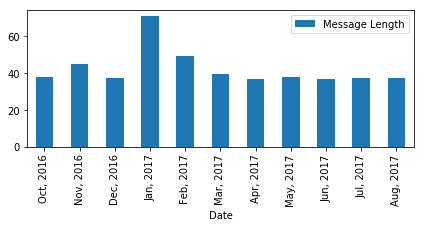

In [21]:
#Length of messages (aggregate average)

#TODO: NEED TO DO COHORT ANALYSIS

#Get messages + timestamps
df = pd.DataFrame({'date':timestamps, 'messages':message})
df['Date'] = pd.to_datetime(df['date'],unit='ms')

#Find length of each post
df['length'] = df['messages'].str.len()
#df['count'] = 1
del df["messages"]
del df["date"]
df.index = df['Date']
#print df

#Find Average + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).mean().reset_index()
gb.columns = ["Year", "Month", "Message Length"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeAverageLength.png')

print gb

In [22]:
#Word Cloud
#idk what I'm doing. Gonna just do: https://github.com/amueller/word_cloud
import unicodedata

#Just get txt file I guess
with open(ChannelName + "ListofMessages.txt", "w") as output:
    for item in message:
        temp = unicodedata.normalize('NFKD', item).encode('ascii','ignore')
        """     
        stopwords = ['http','https','tweet','new','New','twitter','Twitter', 'Tweet']
        #querywords = temp.split()
        for word in stopwords:
            temp = temp.replace(word, '')
        """
        #print result
        #take out http, https, links etc.
        output.write(temp)

In [ ]:
#Check hate word frequency

#Use ntlk and hatelibrary
#http://www.nltk.org/book/ch01.html
#hatelibrary sign up for API: https://www.hatebase.org/login_register/registration_success
#a29261266be5f2798d7d08bac9bb70d6
#Daily Limit = 100 <=
#But I can always get a new key

#python wrapper : https://github.com/DanielJDufour/hatebase
messages

listofHatewords = []
frequency = []

#Total mentions of words in posts
#=>Treats each word in every post as equal<=

{u'data': {u'320404832823410690': {u'342115322356170753': {u'm': u'were not racists, were race realists',
    u't': 1501637049045,
    u'u': 63},
   u'342513662545756160': {u'm': u'we are not going HOLOCAUST right away',
    u't': 1501732020747,
    u'u': 2},
   u'342806555227324437': {u'm': u'There are some discords where you can',
    u't': 1501801851804,
    u'u': 8},
   u'342793549604978698': {u'm': u'The British white man who landed the probe on the comet had his victory ruined when the twitter outrage brigade said his t shirt was sexism.  They forced him to make a tearful apology rather than praising him for landing a probe on a comet.',
    u't': 1501798751022,
    u'u': 7},
   u'341982001114644480': {u'm': u'<@331165540347412481> what about "colonizing" non whites? Obviously without impregnating them',
    u't': 1501605262784,
    u'u': 8},
   u'342806279867203584': {u'm': u"No. Is that something I can grab from the server? I don't know my way around discord very well",
    u't

In [25]:
#Break data into only the month of august
df = pd.DataFrame({'Date':timestamps, 'Messages': message})
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
augustdf = df[(df['Date'] >= '2017-08-1') & (df['Date'] <= '2017-08-17')]
print "# of August messages " + str(len(augustdf.index))

# of August messages 146970


,Date,Messages
Date,,
2017-08-08 06:18:29.209,2017-08-08 06:18:29.209,hes a fatass
2017-08-05 17:36:29.525,2017-08-05 17:36:29.525,
2017-08-11 12:35:59.858,2017-08-11 12:35:59.858,<@188953331517882368> No. I am a heterosexual
2017-08-14 18:56:23.272,2017-08-14 18:56:23.272,hey sed
2017-08-06 13:03:27.626,2017-08-06 13:03:27.626,?
2017-08-12 23:02:48.875,2017-08-12 23:02:48.875,^
2017-08-08 18:35:56.392,2017-08-08 18:35:56.392,A cuck
2017-08-04 22:09:00.654,2017-08-04 22:09:00.654,<@230129075589611540> \nhttps://www.youtube.co...
2017-08-11 12:50:04.636,2017-08-11 12:50:04.636,


146970
146970


/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


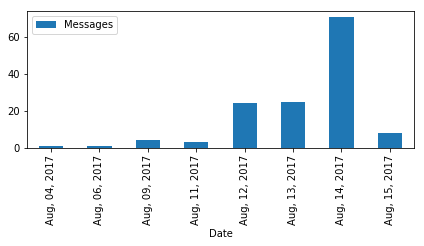

In [28]:
#Check how many mentions of "Unite the Right" or "Charlottesville"
containsWords = []
mentionFrequency = []

#print len(message)
augustMessage = augustdf['Messages'].tolist()
print len(augustMessage)
for m in augustMessage:
    words = ["unite the right", "charlottesville"]
    lowercase = m.lower()
    containedWord = False
    count = 0
    for word in words:
        #!!!!!!!!!!!!!!!! Updated
        if word in lowercase and not containedWord:
            containedWord = True
            containsWords.append(1)
            #FIND HOW MANY MENTIONS PER MESSAGE
            count = count + lowercase.count(word)
    #print count
    mentionFrequency.append(count)
            
    if not containedWord:
        containsWords.append(0)
        
"""print len(containsWords)
print len(message)

print containsWords"""
print len(containsWords)
augustDates = augustdf['Date'].tolist()

df = pd.DataFrame({'date':augustDates, 'mentionsCharlottesville':containsWords})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
gb = df[df.mentionsCharlottesville.isin([1])]
gb['Date'] = pd.to_datetime(gb['date'],unit='ms')
gb["mentions"] = gb["mentionsCharlottesville"]
del gb['date']
del gb["mentionsCharlottesville"]
gb.index = gb['Date']
del gb["Date"]

#print gb
#print gb
#REmove all data without any mentions about discord

#print df
#Find Max + Reset Index (so that I can reassign column names)
gb = gb.groupby([(gb.index.year),(gb.index.month), (gb.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %d, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'RallyMentionsBarDay.png')

#Total mentions
#print len(mentionFrequency)
#print len(containsWords)




/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


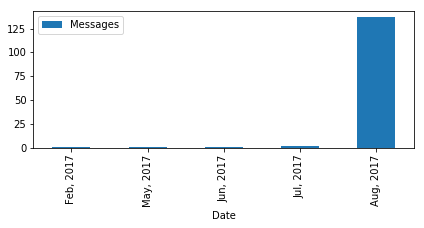

In [32]:
#Check how many mentions of "Unite the Right" or "Charlottesville"
containsWords = []
mentionFrequency = []

#print len(message)
for m in message:
    words = ["unite the right", "charlottesville"]
    lowercase = m.lower()
    containedWord = False
    count = 0
    for word in words:
        #!!!!!!!!!!!!!!!! Updated
        if word in lowercase and not containedWord:
            containedWord = True
            containsWords.append(1)
            #FIND HOW MANY MENTIONS PER MESSAGE
            count = count + lowercase.count(word)
    #print count
    mentionFrequency.append(count)
            
    if not containedWord:
        containsWords.append(0)
        
"""print len(containsWords)
print len(message)

print containsWords"""

df = pd.DataFrame({'date':timestamps, 'mentionsCharlottesville':containsWords})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
gb = df[df.mentionsCharlottesville.isin([1])]
gb['Date'] = pd.to_datetime(gb['date'],unit='ms')
gb["mentions"] = gb["mentionsCharlottesville"]
del gb['date']
del gb["mentionsCharlottesville"]
gb.index = gb['Date']
del gb["Date"]

#print gb
#print gb
#REmove all data without any mentions about discord

#print df
#Find Max + Reset Index (so that I can reassign column names)
gb = gb.groupby([(gb.index.year),(gb.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'RallyMentionsBarMonth.png')

#Total mentions
#print len(mentionFrequency)
#print len(containsWords)




2979089


/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


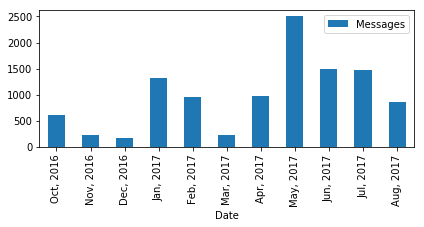

In [33]:
#Check how many mentions of "Unite the Right" or "Charlottesville"
containsWords = []
mentionFrequency = []

#print len(message)
for m in message:
    words = ["nigger"]
    lowercase = m.lower()
    containedWord = False
    count = 0
    for word in words:
        #!!!!!!!!!!!!!!!! Updated
        if word in lowercase and not containedWord:
            containedWord = True
            containsWords.append(1)
            #FIND HOW MANY MENTIONS PER MESSAGE
            count = count + lowercase.count(word)
    #print count
    mentionFrequency.append(count)
            
    if not containedWord:
        containsWords.append(0)
        
print len(containsWords)
#print len(message)

#print containsWords

df = pd.DataFrame({'date':timestamps, 'mentionsCharlottesville':containsWords})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
gb = df[df.mentionsCharlottesville.isin([1])]
gb['Date'] = pd.to_datetime(gb['date'],unit='ms')
gb["mentions"] = gb["mentionsCharlottesville"]
del gb['date']
del gb["mentionsCharlottesville"]
gb.index = gb['Date']
del gb["Date"]

#print gb
#print gb
#REmove all data without any mentions about discord

#print df
#Find Max + Reset Index (so that I can reassign column names)
gb = gb.groupby([(gb.index.year),(gb.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'RallyMentionsNWordBarMonth.png')

#Total mentions
#print len(mentionFrequency)
#print len(containsWords)




2979089


/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


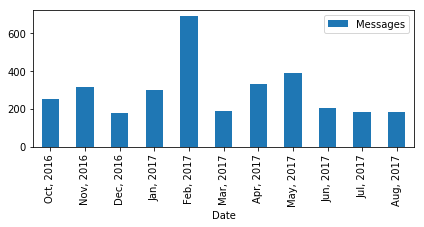

In [34]:
#Check how many mentions of "Unite the Right" or "Charlottesville"
containsWords = []
mentionFrequency = []

#print len(message)
for m in message:
    words = ["raid"]
    lowercase = m.lower()
    containedWord = False
    count = 0
    for word in words:
        #!!!!!!!!!!!!!!!! Updated
        if word in lowercase and not containedWord:
            containedWord = True
            containsWords.append(1)
            #FIND HOW MANY MENTIONS PER MESSAGE
            count = count + lowercase.count(word)
    #print count
    mentionFrequency.append(count)
            
    if not containedWord:
        containsWords.append(0)
        
print len(containsWords)
#print len(message)

#print containsWords

df = pd.DataFrame({'date':timestamps, 'mentionsCharlottesville':containsWords})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
gb = df[df.mentionsCharlottesville.isin([1])]
gb['Date'] = pd.to_datetime(gb['date'],unit='ms')
gb["mentions"] = gb["mentionsCharlottesville"]
del gb['date']
del gb["mentionsCharlottesville"]
gb.index = gb['Date']
del gb["Date"]

#print gb
#print gb
#REmove all data without any mentions about discord

#print df
#Find Max + Reset Index (so that I can reassign column names)
gb = gb.groupby([(gb.index.year),(gb.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'RallyMentionsRaidBarMonth.png')

#Total mentions
#print len(mentionFrequency)
#print len(containsWords)




In [9]:
#input list of hatewords from text file
listofHatewords = json.load(open('listofhatewords.json'))

In [10]:
test123 = "nigger n*gger niggs"

test123 = test123.split(" ")

print difflib.get_close_matches("nigger", test123, 10, .75)

['nigger', 'n*gger']


In [11]:
#Check hate word frequency



#Use ntlk and hatelibrary

#http://www.nltk.org/book/ch01.html
#hatelibrary sign up for API: https://www.hatebase.org/login_register/registration_success
#a29261266be5f2798d7d08bac9bb70d6
#Daily Limit = 100 <=
#But I can always get a new key

#Do ntlk stuff after

#Two types of graphs: one for frequency among all words and frequency among all posts.

#NOTE
"""
If you publish work that uses NLTK, please cite the NLTK book as follows:

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.
"""


#print data
#print listofHatewords
#print len(listofHatewords)
#print listofHatewords

"""#test difflib

test123 = "dyke d*ke dy*e dnke"

test123 = test123.split(" ")

print difflib.get_close_matches("dyke", test123, 10, .75)"""

#python wrapper : https://github.com/DanielJDufour/hatebase

#Message is equal to each other

#print len(message)
#initiate lists to set length
frequency = []
versionsOfWord = []
#frequencyID = []
frequencyTime = []
#Index of original message list
listmessageID = []
listauthors = []
frequencyIndex = []
for x in range(0, 1000):
    frequency.append(0)

"""
for x in range(0, 1000):
    frequencyID.append([])
"""
for x in range(0, 1000):
    listmessageID.append([])
for x in range(0, 1000):
    listauthors.append([])

for x in range(0, 1000):
    frequencyTime.append([])
for x in range(0, 1000):
    frequencyIndex.append([])
    
for x in range(0, 1000):
    versionsOfWord.append([])

#NTLK 
#FROM: https://stackoverflow.com/a/45158719/4698963
from nltk.corpus import wordnet as wn
#We'll store the derivational forms in a set to eliminate duplicates
index2 = 0
for word in listofHatewords:
    forms = set()
    for happy_lemma in wn.lemmas(word): #for each "happy" lemma in WordNet
        forms.add(happy_lemma.name()) #add the lemma itself
        for related_lemma in happy_lemma.derivationally_related_forms(): #for each related lemma
            forms.add(related_lemma.name()) #add the related lemma
        versionsOfWord[index2] = forms
    index2 += 1
print len(versionsOfWord)

"""#Measure time of loop
import time
start = time.clock() """

#old code
#Time for 254776 messages: 3323.288668 seconds
#Time for all 2979089 result minimum: 10.7942016982 hours

#new code
#Time for 1000 messages: 13.301362 seconds
#Time for 2979089 messages: 11.007205894227 hours

#new new code
#Time for 1000 messages: 11.202224 second
#Time for 2979089 messages: 9.2701173038712 hours
    
totalNumberofWords = 0
counter = 0
print len(message)
print len(messageID)
print len(timestamps)
for m, m_id, date, a_id in zip(message, messageID, timestamps, authorID):
    #print m
    totalNumberofWords += len(m)
    lower = m.lower()
    index = 0

    
    
    if counter%100000==0:
        print counter
    #print counter
    #Need to tokenize to get all frequencies
    for word in listofHatewords:
        wordLowered = word.lower()
        listof_lower = lower.split(" ")
        similarWords = versionsOfWord[index]

        #matchesHate = difflib.get_close_matches(word, listof_lower, 1, .5)
        #https://docs.python.org/2/library/difflib.html
        #Else if check the NTLK forms of words
        #Check if there are versions of the word first though
        #TOOK out "word in lower" since it was inaccurate
        if wordLowered in listof_lower or len(difflib.get_close_matches(wordLowered, listof_lower, 1, .75)) >= 1:
            frequency[index]+=1
            frequencyIndex[index].append(counter)
            #frequencyID[index].append(str(m_id) + " " + m)
            frequencyTime[index].append(date)
            listmessageID[index].append(m_id)
            listauthors[index].append(a_id)
        elif len(similarWords) > 0:
            #found = False
            for a in similarWords:
                aLowered = a.lower()
                if aLowered in listof_lower or len(difflib.get_close_matches(aLowered, listof_lower, 1, .75)) >= 1:
                    #found = True
                    frequency[index]+=1
                    frequencyIndex[index].append(counter)
                    #frequencyID[index].append(str(m_id) + " " + m)
                    frequencyTime[index].append(date)
                    listmessageID[index].append(m_id)
                    listauthors[index].append(a_id)
                    #print "test" + str(counter)
                    break 
        #Increase index to make sense
        if index >= len(listofHatewords):
            print "Length error"
        
        index+=1
    counter += 1

#check asterisk. 
#Get list of words
#Use difflib library => get_close_matches of words. Cutoff value
#Use NTLK
#Think about software filtering methods

print "All Done" + str(len(message))
#print frequency



#Total mentions of words in posts
#=>Treats each word in every post as equal<=

#Process data
jsonList = []

for i in range(0,1000):
    jsonList.append({'hateword': listofHatewords[i], 'messageID': listmessageID[i], 'authorID':listauthors[i], 'frequency': frequency[i], 'frequencyIndex':frequencyIndex[i], 'frequencyTime':frequencyTime[i]})
    
#print(json.dumps(jsonList, indent = 1))

#Put to file
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
try:
    f = open(ChannelName + 'Allfrequencies'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "Allfrequencies.json! Be careful!!!"

1000
2979089
2979089
2979089
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
All Done2979089


In [ ]:
print len(messages)

In [ ]:
#If can't complete, just do:
#print "Count of messages" + str(counter)
#length of messages = counter
"""print len(listofHatewords)
print len(frequency)
print len(frequencyID)
print len(frequencyTime)
print listofHatewords
print ""
print frequency
print ""
print frequencyID
print ""
print frequencyTime
Allfrequencies =json.dumps([{'hateword': listofHatewords, 'frequency': frequency, 'frequencyID':frequencyID, 
                            'frequencyTime':frequencyTime} for country, wins in zip(a, b)])"""

jsonList = []

for i in range(0,1000):
    jsonList.append({'hateword': listofHatewords[i], 'frequency': frequency[i], 'frequencyID':frequencyID[i], 'frequencyTime':frequencyTime[i]})
    


print(json.dumps(jsonList, indent = 1))

In [27]:
#Save frequency to file
#Store frequency
#output list of hate words into text file
#DON'T RUN
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
"""try:
    f = open(ChannelName + 'frequencyHate.json' + str(timestr), 'w')
    simplejson.dump(frequency, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "frequencyHate.json! Be careful!!!"
try:
    f = open(ChannelName + 'frequencyIDMessages.json' + str(timestr), 'w')
    simplejson.dump(frequencyID, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "frequencyIDMessages.json! Be careful!!!"
try:
    f = open(ChannelName + 'frequencyTime.json' + str(timestr), 'w')
    simplejson.dump(frequencyTime, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "frequencyTime.json! Be careful!!!"
    """
try:
    f = open(ChannelName + 'Allfrequencies'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "Allfrequencies.json! Be careful!!!"

#print frequency

In [ ]:
print "hi"

In [ ]:
#Check hate word frequency



#Use ntlk and hatelibrary
#http://www.nltk.org/book/ch01.html
#hatelibrary sign up for API: https://www.hatebase.org/login_register/registration_success
#a29261266be5f2798d7d08bac9bb70d6
#Daily Limit = 100 <=
#But I can always get a new key

#Do ntlk stuff after

#Two types of graphs: one for frequency among all words and frequency among all posts.

#NOTE
"""
If you publish work that uses NLTK, please cite the NLTK book as follows:

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.
"""


#print data
#print listofHatewords
#print len(listofHatewords)
#print listofHatewords

"""#test difflib

test123 = "dyke d*ke dy*e dnke"

test123 = test123.split(" ")

print difflib.get_close_matches("dyke", test123, 10, .75)"""

#python wrapper : https://github.com/DanielJDufour/hatebase

#Message is equal to each other

#print len(message)
#initiate lists to set length
frequency = []
versionsOfWord = []
#frequencyID = []
frequencyTime = []
#Index of original message list
listmessageID = []
listauthors = []
frequencyIndex = []
for x in range(0, 1000):
    frequency.append(0)

"""
for x in range(0, 1000):
    frequencyID.append([])
"""
for x in range(0, 1000):
    listmessageID.append([])
for x in range(0, 1000):
    listauthors.append([])

for x in range(0, 1000):
    frequencyTime.append([])
for x in range(0, 1000):
    frequencyIndex.append([])
    
for x in range(0, 1000):
    versionsOfWord.append([])

#NTLK 
#FROM: https://stackoverflow.com/a/45158719/4698963
from nltk.corpus import wordnet as wn
#We'll store the derivational forms in a set to eliminate duplicates
index2 = 0
for word in listofHatewords:
    forms = set()
    for happy_lemma in wn.lemmas(word): #for each "happy" lemma in WordNet
        forms.add(happy_lemma.name()) #add the lemma itself
        for related_lemma in happy_lemma.derivationally_related_forms(): #for each related lemma
            forms.add(related_lemma.name()) #add the related lemma
        versionsOfWord[index2] = forms
    index2 += 1
print len(versionsOfWord)

"""#Measure time of loop
import time
start = time.clock() """

#old code
#Time for 254776 messages: 3323.288668 seconds
#Time for all 2979089 result minimum: 10.7942016982 hours

#new code
#Time for 1000 messages: 13.301362 seconds
#Time for 2979089 messages: 11.007205894227 hours

#new new code
#Time for 1000 messages: 11.202224 second
#Time for 2979089 messages: 9.2701173038712 hours
    
totalNumberofWords = 0
counter = 0
print len(message)
print len(messageID)
print len(timestamps)
for m, m_id, date, a_id in zip(message, messageID, timestamps, authorID):
    #print m
    totalNumberofWords += len(m)
    lower = m.lower()
    index = 0

    
    
    if counter%100000==0:
        print counter
    #print counter
    #Need to tokenize to get all frequencies
    for word in listofHatewords:
        wordLowered = word.lower()
        listof_lower = lower.split(" ")
        similarWords = versionsOfWord[index]

        #matchesHate = difflib.get_close_matches(word, listof_lower, 1, .5)
        #https://docs.python.org/2/library/difflib.html
        #Else if check the NTLK forms of words
        #Check if there are versions of the word first though
        #TOOK out "word in lower" since it was inaccurate
        if wordLowered in listof_lower or len(difflib.get_close_matches(wordLowered, listof_lower, 1, .75)) >= 1:
            frequency[index]+=1
            frequencyIndex[index].append(counter)
            #frequencyID[index].append(str(m_id) + " " + m)
            frequencyTime[index].append(date)
            listmessageID[index].append(m_id)
            listauthors[index].append(a_id)
        elif len(similarWords) > 0:
            #found = False
            for a in similarWords:
                aLowered = a.lower()
                if aLowered in listof_lower or len(difflib.get_close_matches(aLowered, listof_lower, 1, .75)) >= 1:
                    #found = True
                    frequency[index]+=1
                    frequencyIndex[index].append(counter)
                    #frequencyID[index].append(str(m_id) + " " + m)
                    frequencyTime[index].append(date)
                    listmessageID[index].append(m_id)
                    listauthors[index].append(a_id)
                    #print "test" + str(counter)
                    break 
        #Increase index to make sense
        if index >= len(listofHatewords):
            print "Length error"
        
        index+=1
    counter += 1

#check asterisk. 
#Get list of words
#Use difflib library => get_close_matches of words. Cutoff value
#Use NTLK
#Think about software filtering methods

print "All Done" + str(len(message))
#print frequency



#Total mentions of words in posts
#=>Treats each word in every post as equal<=

#Process data
jsonList = []

for i in range(0,1000):
    jsonList.append({'hateword': listofHatewords[i], 'messageID': listmessageID[i], 'authorID':listauthors[i], 'frequency': frequency[i], 'frequencyIndex':frequencyIndex[i], 'frequencyTime':frequencyTime[i]})
    
#print(json.dumps(jsonList, indent = 1))

#Put to file
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
try:
    f = open(ChannelName + 'Allfrequencies'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "Allfrequencies.json! Be careful!!!"

In [10]:
import json
filename = "CentipedeCentralAllfrequencies20180124-215751.json"

jsonF = json.load(open(filename))
import itertools
from __future__ import division
#Store data
frequency = []
messageIndexes = []
nonSorted = []
#find uniqueness
    
for b in jsonF:
    frequency.append(b["frequency"])
    messageIndexes.append(b["frequencyIndex"])
#print messageIndexes
messageIndexes.sort()
neatIndexes = list(messageIndexes for messageIndexes,_ in itertools.groupby(messageIndexes))
print len(neatIndexes)
percentage = (len(neatIndexes)/2979089)*100
print percentage

856
0.0287336162162


In [19]:
#Find how many messages are less than 3 words
lengthsM = []
print len(message)
for a in message:
    lengthsM.append(len(a))
    
#Find average
#print lengthsM
print reduce(lambda x, y: x + y, lengthsM) / len(lengthsM)

#Find lower than 3 words
lower3 = [i for i in lengthsM if i<= 50]

print len(lower3)/len(message)
    

2979089
42.8948765881
0.774032934229
